In [ ]:
import pandas as pd
ck=pd.read_csv('/content/comment_keyword_true_tag.csv')
comments=pd.read_csv('/content/comments.csv')

In [ ]:
comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [ ]:
ck.head()

,Video ID,Comment_tag,Comment_keyword
0,--ZI0dSbbNU,"['’', 'happy', 'eating', 'see', 'u', 'sufferin...","['eating', 'eat', 'eats', 'fry', 'feel', 'smil..."
1,--hxd1CrOqg,"['’', 'really', 'unfortunate', 'intended', 'ta...","['russia', 'til', 'n', 'wo', 'realize', 'ukrai..."
2,--ixiTypG8g,"['biggest', 'problem', 'college', 'charging', ...","['college', 'colleges', 'tuition', 'regulated'..."
3,-64r1hcxtV4,"['8:20-', '10:00', '.....', 'thought', 'happen...","['life', 'inspiration', 'inspiring', 'inspire'..."
4,-6IgkG5yZfo,"['Hope', 'make', 'life', 'easier', '..', '00:4...","['thankful', 'thank', 'thanks', 'time', 'help'..."


In [ ]:
# delete invalid col
comments=comments.drop(columns=['Unnamed: 0'],axis=1)

# delete nan value
comments=comments.dropna()

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# stopwords
new_stopwords = ["video", "s", "to", "on", "daily"]
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)
stpwrd.extend(string.punctuation)


def generate_tag(comments):
    word_tokens=word_tokenize(comments)
    lemmatized_output =[wordnet_lemmatizer.lemmatize(w) for w in word_tokens]
    filter_sen=[w for w in lemmatized_output if not w.lower() in stpwrd]

    return filter_sen

comment_words = ''


comments['Comment_tag']=comments['Comment'].apply(generate_tag)

comments['Comment_tag']=comments['Comment_tag'].apply(str)

comments[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Video ID,Comment,Likes,Sentiment,Comment_tag
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,"['Let', ""'s"", 'forget', 'Apple', 'Pay', '2014'..."
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,"['NZ', '50', 'retailer', '’', 'even', 'contact..."
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,"['forever', 'acknowledge', 'channel', 'help', ..."
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0,"['Whenever', 'go', 'place', '’', 'take', 'Appl..."
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,"['Apple', 'Pay', 'convenient', 'secure', 'easy..."
5,wAZZ-UWGVHI,We’ve been hounding my bank to adopt Apple pay...,8.0,1.0,"['’', 'hounding', 'bank', 'adopt', 'Apple', 'p..."
6,wAZZ-UWGVHI,We only got Apple Pay in South Africa in 2020/...,29.0,2.0,"['got', 'Apple', 'Pay', 'South', 'Africa', '20..."
7,wAZZ-UWGVHI,"For now, I need both Apple Pay and the physica...",7.0,1.0,"['need', 'Apple', 'Pay', 'physical', 'credit',..."
8,wAZZ-UWGVHI,"In the United States, we have an abundance of ...",2.0,2.0,"['United', 'States', 'abundance', 'retailer', ..."
9,wAZZ-UWGVHI,"In Cambodia, we have a universal QR code syste...",28.0,1.0,"['Cambodia', 'universal', 'QR', 'code', 'syste..."


In [ ]:
from nltk import FreqDist, SnowballStemmer
import string
from nltk.corpus import stopwords

stop = stopwords.words('english')
snowball = SnowballStemmer('english')

def pre_process(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [ t for t in tokens if t not in string.punctuation+"’“”" ]
    tokens = [ t for t in tokens if not t.isnumeric() ]
    tokens = [ snowball.stem(t) for t in tokens ]
    tokens=[filter_sen.lemmatize(t) for t in tokens]
    tokens=[word for word in tokens if word not in stpwrd]
    text_after_process=" ".join(tokens)
    return(text_after_process)

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
####################################### TDM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Create tfidf matrix
vectorizer = TfidfVectorizer(max_df=2000, max_features=2500,
                             min_df=1, stop_words=stpwrd,
                             use_idf=True)
X = vectorizer.fit_transform(ck['Comment_keyword'])
X.shape

(1869, 2500)

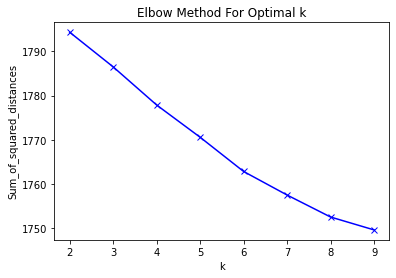

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics


#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
#Maximum number of iterations of the k-means algorithm for a single run.

km3 = KMeans(n_clusters=5, init='k-means++', max_iter=1000,random_state=5)
km3.fit(X)
label=km3.fit(X)

In [ ]:
print("Coefficient for 5 clusters: %0.5f"
      % metrics.silhouette_score(X, km3.labels_))

Coefficient for 5 clusters: 0.00825


In [ ]:
####################################### How many docs in each cluster
import numpy as np
labels, counts = np.unique(km3.labels_[km3.labels_>=0], return_counts=True)
print (labels)
print (counts)

[0 1 2 3 4]
[198 213 296 358 804]


In [ ]:
# The meaning of each cluster
def print_terms(cm, num):
    original_space_centroids = cm.cluster_centers_
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

In [ ]:
print_terms(km3, 5)

Cluster 0: game play playing wa like player gaming played look make
Cluster 1: song que music la love listening en se listen mix
Cluster 2: love loved watching like watch wa look make man great
Cluster 3: thank thanks learning learn wa help helpful work great like
Cluster 4: wa like people time ha thing make great know guy


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# import library necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# components for features reduction
n_components = 5
# number of clusters we want
n_clusters = 5
# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X)

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters for each song
X_clustered = kmeans.fit_predict(X)

# display by groups
df_plot = pd.DataFrame(list(X), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster                                                  0
0        2    (0, 2414)\t0.1726282338691688\n  (0, 1964)\t...
1        0    (0, 770)\t0.3020613217766027\n  (0, 1568)\t0...
2        3    (0, 874)\t0.31046756339726855\n  (0, 972)\t0...
3        0    (0, 2231)\t0.19296363248103224\n  (0, 1467)\...
4        4    (0, 754)\t0.2470325633906811\n  (0, 1996)\t0...
         Cluster
Cluster         
0            670
1            125
2            189
3            532
4            353


In [ ]:
# Logistic Regression approach

ck['Cluster'] = df_plot['Cluster']

# function for finding most significant words for each cluster
def generate_text(cluster):
    
    df_s = ck['Comment_keyword'].values.astype('U')
    y = ck['Cluster'].map(lambda x: 1 if x == cluster else 0)
    count = len(df_s)
    
    tfidf = TfidfVectorizer(stop_words = 'english')
    X = tfidf.fit_transform(df_s)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
    clf_d = DummyClassifier().fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    acc_d = clf_d.score(X_test, y_test)
    coef = clf.coef_.tolist()[0]
    w = tfidf.get_feature_names()
    coeff_df = pd.DataFrame({'words' : w, 'score' : coef})
    coeff_df = coeff_df.sort_values(['score', 'words'], ascending=[0, 1])
    coeff_df = coeff_df[:30]
    d = coeff_df.set_index('words')['score'].to_dict()
    return d, acc, acc_d

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

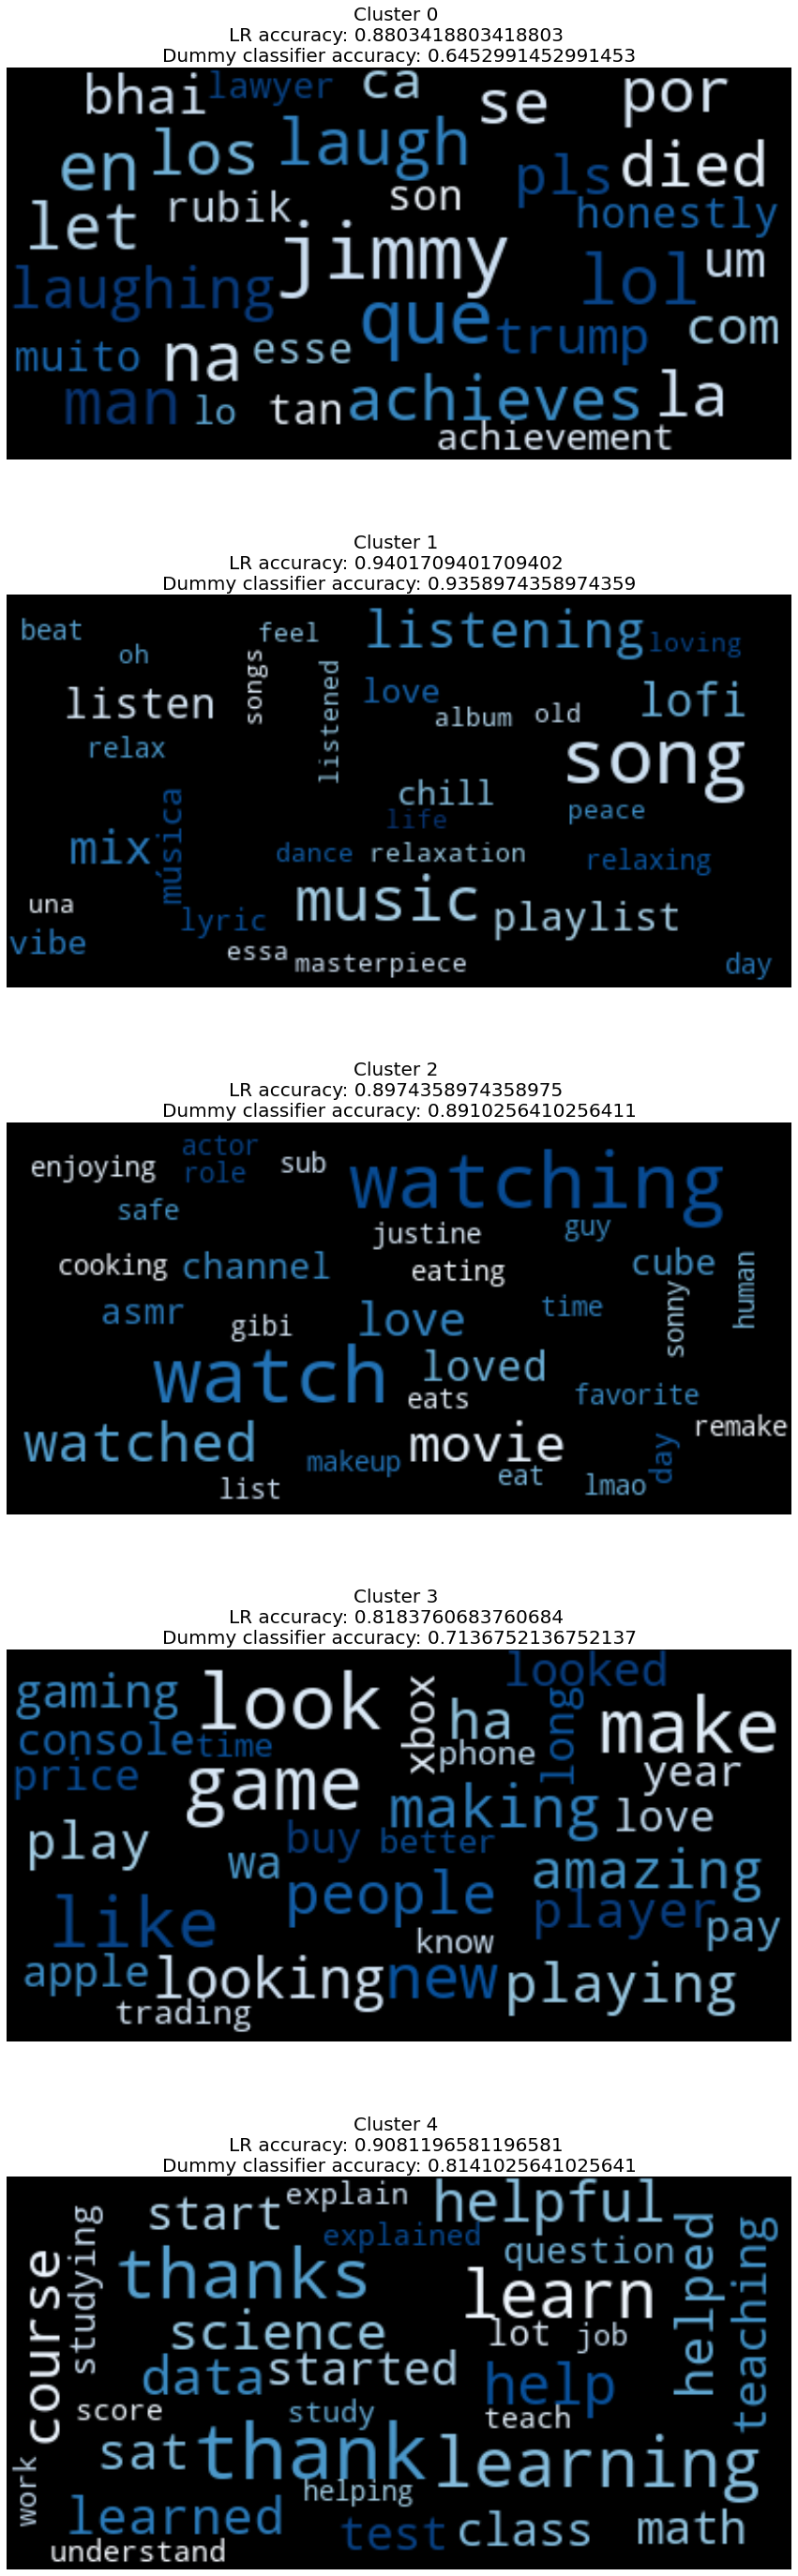

In [ ]:
# visualized it by word clouds
fig, ax = plt.subplots(n_clusters, sharex=True, figsize=(15,10*n_clusters))

for i in range(0, n_clusters):
    d, acc, acc_d = generate_text(i)
    wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Blues', background_color = 'black').fit_words(d)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title('Cluster {} \nLR accuracy: {} \nDummy classifier accuracy: {}'.format(i, acc, acc_d), fontsize = 20)
    ax[i].axis("off")